In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [5]:
x_train.shape



(50000, 32, 32, 3)

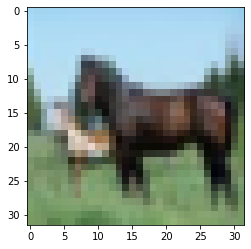

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

In [19]:
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))

In [20]:
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(256, activation = 'relu'))

In [24]:
model.add(Dense(10, activation = 'softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', 
             metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [28]:
model.fit(x_train,y_cat_train, epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5300 - accuracy: 0.4420 - val_loss: 1.3534 - val_accuracy: 0.5105
Epoch 2/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1866 - accuracy: 0.5776 - val_loss: 1.1300 - val_accuracy: 0.5987
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0352 - accuracy: 0.6321 - val_loss: 1.0560 - val_accuracy: 0.6276
Epoch 4/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9293 - accuracy: 0.6724 - val_loss: 1.0043 - val_accuracy: 0.6469
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8327 - accuracy: 0.7055 - val_loss: 1.0153 - val_accuracy: 0.6451
Epoch 6/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7407 - accuracy: 0.7397 - val_loss: 1.1015 - val_accuracy: 0.6381


In [29]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

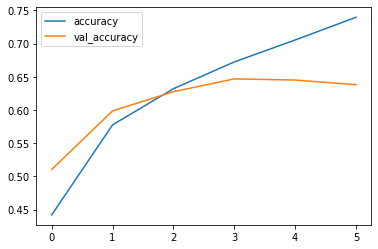

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.529985,0.44200,1.353444,0.5105
1,1.186645,0.57760,1.130028,0.5987
2,1.035193,0.63210,1.056050,0.6276
3,0.929311,0.67242,1.004286,0.6469
4,0.832734,0.70546,1.015260,0.6451
5,0.740676,0.73972,1.101488,0.6381


In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1015 - accuracy: 0.6381


[1.1014877557754517, 0.6381000280380249]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1000
           1       0.79      0.81      0.80      1000
           2       0.50      0.55      0.53      1000
           3       0.43      0.51      0.46      1000
           4       0.60      0.54      0.57      1000
           5       0.69      0.35      0.46      1000
           6       0.50      0.88      0.64      1000
           7       0.80      0.64      0.71      1000
           8       0.78      0.73      0.76      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



In [38]:
confusion_matrix(y_test, predictions)

array([[679,  23,  91,  31,  27,   5,  35,  11,  69,  29],
       [ 19, 807,   6,  11,   5,   4,  31,   3,  51,  63],
       [ 54,   7, 552,  79,  74,  30, 162,  18,  13,  11],
       [ 13,  16,  99, 508,  70,  54, 200,  11,  16,  13],
       [ 15,   9, 112,  62, 539,  15, 186,  48,  10,   4],
       [  8,   6,  94, 312,  51, 347, 128,  48,   5,   1],
       [  2,   3,  42,  39,  14,   4, 882,   3,   8,   3],
       [ 17,   2,  60,  89,  87,  36,  52, 637,   4,  16],
       [114,  32,  23,  24,  20,   3,  29,   3, 732,  20],
       [ 38, 123,  17,  30,   8,   3,  46,  10,  27, 698]], dtype=int64)

In [39]:
import seaborn as sns

<AxesSubplot:>

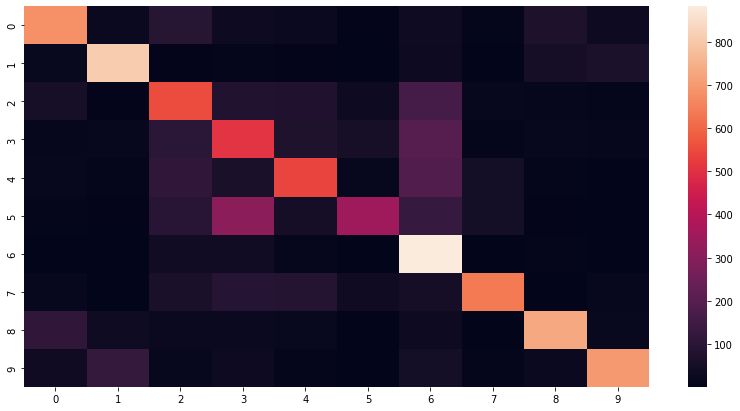

In [41]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test, predictions))


In [42]:
my_image = x_test[0]

In [43]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)